In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from math import sqrt
import math
from scipy.stats import norm as detnorm
from matplotlib.mlab import PCA
import numpy as np
import numpy.linalg as linalg
from random import sample
import csv
import copy
import os
from sklearn.metrics import confusion_matrix 

import glob
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
np.random.seed(1337)

In [45]:
def func2(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes =["o","1","4","6","z"] 
    #classes=["highway","mountain","forst","str","insc"]
    #classes =["a","ai","cha","la","da"] 
    #classes =[","cha","la","da"] 
    #classes =["0","1"] 
    # classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [37]:
def ROC (P,T):
    inc = 0.001
    n = np.size(P,0)
    m = np.size(P,1)
    TPR = np.zeros(1000) # change accordingly with inc
    FPR = np.zeros(1000)
    i = 0
    #print(n)
    for tet in np.arange(0.0, 1.0, inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            #print(cls)
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        TPR[i] = TP/(TP + FN)
        FPR[i] = FP/(FP + TN)     
        i = i + 1
    plt.plot(FPR,TPR)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    
def ROCmodf (P,T,num):
    mini = np.amin(P)
    maxi = np.amax(P)
    inc = (maxi-mini)/num
    n = np.size(P,0)
    m = np.size(P,1)
    TPR = np.zeros(num+2) # change accordingly with inc
    FPR = np.zeros(num+2)
    i = 0
    #print(n)
    for tet in np.arange(mini,maxi+inc,inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            #print(cls)
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        TPR[i] = TP/(TP + FN)
        FPR[i] = FP/(FP + TN)   
        i = i + 1
    plt.plot(FPR,TPR)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
def ROCmodff (P,T,num,lab):
    mini = np.amin(P)
    maxi = np.amax(P)
    inc = (maxi-mini)/num
    n = np.size(P,0)
    m = np.size(P,1)
    TPR = np.zeros(num+2) # change accordingly with inc
    FPR = np.zeros(num+2)
    i = 0
    #print(n)
    for tet in np.arange(mini,maxi+inc,inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            #print(cls)
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        TPR[i] = TP/(TP + FN)
        FPR[i] = FP/(FP + TN)   
        i = i + 1
    plt.plot(FPR,TPR,label=lab)
    plt.xlabel('FPR')
    plt.ylabel('TPR') 
def DETmodf (P,T,num):
    dnorm = lambda t:(detnorm.ppf(t))
    mini = np.amin(P)
    maxi = np.amax(P)
    inc = (maxi-mini)/num
    n = np.size(P,0)
    m = np.size(P,1)
    FPR = np.zeros(num+2) # change accordingly with inc
    FNR = np.zeros(num+2)
    i = 0
    #print(inc)
    for tet in np.arange(mini,maxi+inc,inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        FNR[i] = FN/(TP + FN)
        FPR[i] = FP/(FP + TN)     
        i = i + 1
    FPR1 = (np.array([dnorm(xi) for xi in FPR]))
    FNR1 = (np.array([dnorm(xi) for xi in FNR]))
    #print(FPR1)
    #print(FNR1)
    #detection_error_tradeoff(FPR1,FNR1)
    plt.plot(FPR1,FNR1)
    plt.show()
def DETmodff (P,T,num,lab):
    dnorm = lambda t:(detnorm.ppf(t))
    mini = np.amin(P)
    maxi = np.amax(P)
    inc = (maxi-mini)/num
    n = np.size(P,0)
    m = np.size(P,1)
    FPR = np.zeros(num+2) # change accordingly with inc
    FNR = np.zeros(num+2)
    i = 0
    #print(inc)
    for tet in np.arange(mini,maxi+inc,inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        FNR[i] = FN/(TP + FN)
        FPR[i] = FP/(FP + TN)     
        i = i + 1
    FPR1 = (np.array([dnorm(xi) for xi in FPR]))
    FNR1 = (np.array([dnorm(xi) for xi in FNR]))
    #print(FPR1)
    #print(FNR1)
    #detection_error_tradeoff(FPR1,FNR1)
    plt.plot(FPR1,FNR1,label=lab)

In [4]:
sypath = r'/home/moiz/Documents/PRMLlab4/6'
trdata = np.loadtxt(sypath+"/train.txt",delimiter=",")
y_trdata = np.reshape(trdata[:,2],(-1,1))
X_trdata = trdata[:,0:2]
# data1=data[np.nonzero(labels[:,0]==1)]
# sydata1=pd.DataFrame(data1,index=None)
# sydata1=sydata1.loc[:,0:1]

# data2=data[np.nonzero(labels[:,0]==2)]
# sydata2=pd.DataFrame(data2,index=None)
# sydata2=sydata2.loc[:,0:1]

# sydata1.reset_index()
# sydata2.reset_index()

tedata = np.loadtxt(sypath+"/dev.txt",delimiter=",")
y_tedata = np.reshape(tedata[:,2],(-1,1))
X_tedata = tedata[:,0:2]

# data1=data[np.nonzero(labels[:,0]==1)]
# syddata1=pd.DataFrame(data1,index=None)
# syddata1=syddata1.loc[:,0:1]
# data2=data[np.nonzero(labels[:,0]==2)]
# syddata2=pd.DataFrame(data2,index=None)
# syddata2=syddata2.loc[:,0:1]
# syddata1.reset_index()
# syddata2.reset_index()

In [47]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [48]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1,probability=True).fit(X_trdata, y_trdata) 
svm_predictions = svm_model_linear.predict(X_tedata) 

accuracy = svm_model_linear.score(X_tedata, y_tedata) 

svm_model_gauss = SVC(kernel = 'rbf', gamma = "auto",C=1,probability=True).fit(X_trdata, y_trdata) 
svm_gauss_predictions = svm_model_gauss.predict(X_tedata) 
gauss_accuracy = svm_model_gauss.score(X_tedata, y_tedata) 
print(gauss_accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
SVg=svm_model_gauss.support_vectors_
SVl=svm_model_linear.support_vectors_

plt.show()

Text(0.5, 1.0, 'Decision boundary and Surface for SVM linear kernel Synthetic')

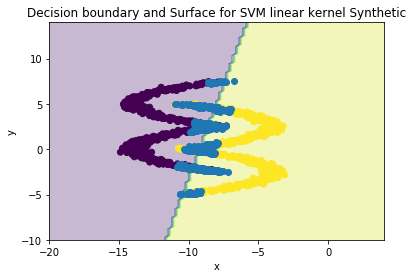

In [60]:
nx,ny = 100,100

y = np.linspace(-10,14,ny)
x = np.linspace(-20,4,nx)
A,B = np.meshgrid(x,y)
z = np.zeros((nx,ny))
for i in range(nx):
    #print(i)
    for j in range(ny):
        z[i,j] = (svm_model_linear.predict([[A[i,j],B[i,j]]]))

        
plt.xlabel("x")
plt.ylabel("y")
#plt.xlim(x_l,x_r)

plt.contourf(A,B,z,alpha=0.3)
plt.scatter(tedata[:,0],tedata[:,1],c =tedata[:,2] )
plt.scatter(SVl[:,0],SVl[:,1])

plt.title("Decision boundary and Surface for SVM linear kernel Synthetic")
#plt.savefig('NN-synthetic-decision-998-2hidden.jpg')

Text(0.5, 1.0, 'Decision boundary and Surface SVM Gaussian kernel Synthetic')

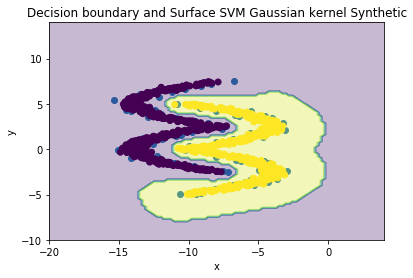

In [61]:
nx,ny = 100,100

y = np.linspace(-10,14,ny)
x = np.linspace(-20,4,nx)
A,B = np.meshgrid(x,y)
z = np.zeros((nx,ny))
for i in range(nx):
    #print(i)
    for j in range(ny):
        z[i,j] = (svm_model_gauss.predict([[A[i,j],B[i,j]]]))

        
plt.xlabel("x")
plt.ylabel("y")
#plt.xlim(x_l,x_r)
plt.scatter(SVg[:,0],SVg[:,1])

plt.contourf(A,B,z,alpha=0.3)
plt.scatter(tedata[:,0],tedata[:,1],c =tedata[:,2] )
plt.title("Decision boundary and Surface SVM Gaussian kernel Synthetic")
#plt.savefig('NN-synthetic-decision-998-2hidden.jpg')

In [114]:
print(svm_gauss_predictions)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

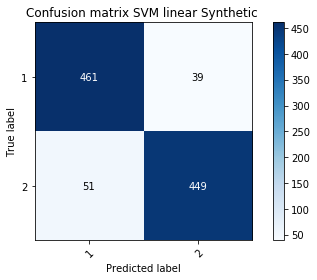

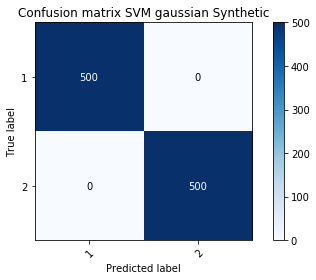

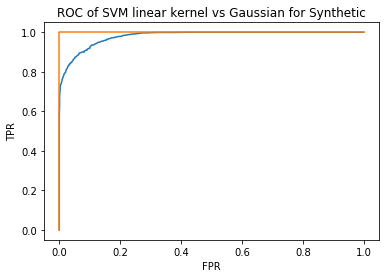

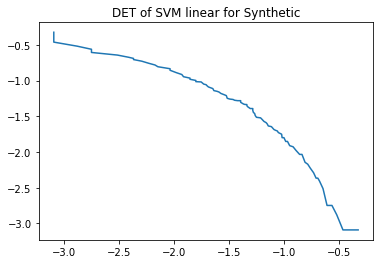

In [11]:
Predicted = svm_model_linear.predict(X_tedata)

prob = svm_model_linear.predict_proba(X_tedata)

T=np.full(500,1,dtype='int')
T = np.concatenate((T,np.full(500,2,dtype='int')))


#print(T)

func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix SVM linear Synthetic ')
gPredicted = svm_model_gauss.predict(X_tedata)

gprob = svm_model_gauss.predict_proba(X_tedata)

T=np.full(500,1,dtype='int')
T = np.concatenate((T,np.full(500,2,dtype='int')))


#print(T)

func2(T,gPredicted,classes=["1","2","3"],title='Confusion matrix SVM gaussian Synthetic')
plt.show()
T=np.full(500,0,dtype='int')
T = np.concatenate((T,np.full(500,1,dtype='int')))

plt.title("ROC of SVM linear kernel vs Gaussian for Synthetic")
ROCmodff(prob,T,100,"linear")
ROCmodff(gprob,T,100,"gaussain")
plt.show()

plt.title("DET of SVM linear for Synthetic")
DETmodff(prob,T,100,"linear")
DETmodff(gprob,T,100,"gaussian")
plt.show()

In [150]:
def redundancy(files,res_dim):
    train = []
    traincounts = []
    for e in files:
        a = np.loadtxt(e)
        a1 = np.reshape(a[1:],(-1,2))
        a1[:,0] = (a1[:,0]-a1[:,0].min())/(a1[:,0].max()-(a1[:,0].min()))
        a1[:,1] = (a1[:,1]-a1[:,1].min())/(a1[:,1].max()-(a1[:,1].min()))
        curr = int(a[0])
        x,y =[],[]
        for i in range(int(curr)):
            x +=[a1[:,0][i]]*(res_dim//curr + int(res_dim%curr>i))
            y +=[a1[:,1][i]]*(res_dim//curr + int(res_dim%curr>i))
        train+=[np.reshape([[i,j] for i,j in zip(x,y)],(1,-1))[0]]
        traincounts+=[a[0]]
    return train,traincounts


In [187]:

trainfiles = glob.glob('/home/moiz/Documents/PRML3/*/train/*.txt',recursive=True)
testfiles = glob.glob('/home/moiz/Documents/PRML3/*/dev/*.txt',recursive=True)



X_htrdata,_ = redundancy(trainfiles,178)
X_htedata,_ = redundancy(testfiles,178)
X_htrdata = np.array(X_htrdata)
X_htedata = np.array(X_htedata)
mapping = {}
mapping['a'] = 3.
mapping['ai'] = 2.
mapping['chA'] = 5.
mapping['dA'] = 4.
mapping['lA'] = 1.
y_htrdata=[]
for i in trainfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_htrdata.append(x)
y_htrdata=np.array(y_htrdata)

y_htedata=[]
for i in testfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_htedata.append(x)
y_htedata=np.array(y_htedata)

In [188]:
svm_model_linearh = SVC(kernel = 'linear', C = 1,probability=True).fit(X_htrdata, y_htrdata) 
svm_predictionsh = svm_model_linearh.predict(X_htedata) 

accuracyh = svm_model_linearh.score(X_htedata, y_htedata) 

svm_model_gaussh = SVC(kernel = 'rbf', gamma = "auto",C=1,probability=True).fit(X_htrdata, y_htrdata) 
svm_gauss_predictionsh = svm_model_gaussh.predict(X_htedata) 
gauss_accuracyh = svm_model_gaussh.score(X_htedata, y_htedata) 
print(gauss_accuracyh)

print(accuracyh)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0
1.0


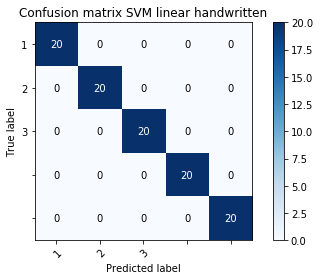

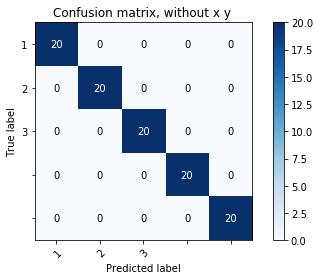

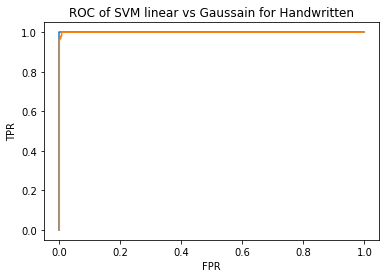

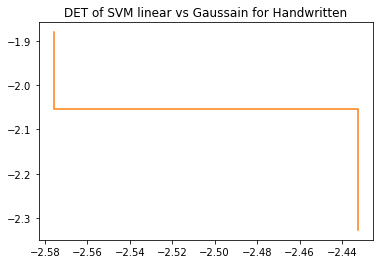

In [206]:
Predicted = svm_model_linearh.predict(X_htedata)

prob = svm_model_linearh.predict_proba(X_htedata)

T=np.full(20,1,dtype='int')
T = np.concatenate((T,np.full(20,2,dtype='int')))
T = np.concatenate((T,np.full(20,3,dtype='int')))
T = np.concatenate((T,np.full(20,4,dtype='int')))
T = np.concatenate((T,np.full(20,5,dtype='int')))

#print(T)

func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix SVM linear handwritten')


gPredicted = svm_model_gaussh.predict(X_htedata)

gprob = svm_model_gaussh.predict_proba(X_htedata)

T=np.full(20,1,dtype='int')
T = np.concatenate((T,np.full(20,2,dtype='int')))
T = np.concatenate((T,np.full(20,3,dtype='int')))
T = np.concatenate((T,np.full(20,4,dtype='int')))
T = np.concatenate((T,np.full(20,5,dtype='int')))
func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix, without x y ')


plt.show()
T=np.full(20,0,dtype='int')
T = np.concatenate((T,np.full(20,1,dtype='int')))
T = np.concatenate((T,np.full(20,2,dtype='int')))
T = np.concatenate((T,np.full(20,3,dtype='int')))
T = np.concatenate((T,np.full(20,4,dtype='int')))

plt.title("ROC of SVM linear vs Gaussain for Handwritten")
ROCmodff(prob,T,100,"linear")
ROCmodff(gprob,T,100,"gaussian")
plt.show()

T=np.full(20,0,dtype='int')
T = np.concatenate((T,np.full(20,1,dtype='int')))
T = np.concatenate((T,np.full(20,2,dtype='int')))
T = np.concatenate((T,np.full(20,3,dtype='int')))
T = np.concatenate((T,np.full(20,4,dtype='int')))

plt.title("DET of SVM linear vs Gaussain for Handwritten")
DETmodff(prob,T,100,"linear")
DETmodff(gprob,T,100,"gaussian")
plt.show()

In [16]:
trainfiles = glob.glob('/home/moiz/Documents/PRMLlab4/*/train/*.jpg_color_edh_entropy',recursive=True)
testfiles = glob.glob('/home/moiz/Documents/PRMLlab4/*/dev/*.jpg_color_edh_entropy',recursive=True)
def load_data(files):
    data =[]
    for i in files:
        data+=[np.reshape(np.loadtxt(i),(-1))]
    return np.array(data)
X_itrdata = load_data(trainfiles)
X_itedata = load_data(testfiles)

In [17]:
mapping = {}
mapping['highway'] = 1
mapping['mountain'] = 2
mapping['forest'] = 3
mapping['street'] = 4
mapping['insidecity'] = 5
y_itrdata=[]
for i in trainfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_itrdata.append(x)
y_itrdata=np.array(y_itrdata)

y_itedata=[]
for i in testfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_itedata.append(x)
y_itedata=np.array(y_itedata)

In [18]:
svm_model_lineari = SVC(kernel = 'linear', C = 1,probability=True).fit(X_itrdata, y_itrdata) 
svm_predictionsi = svm_model_lineari.predict(X_itedata) 

accuracyi = svm_model_lineari.score(X_itedata, y_itedata) 

svm_model_gaussi = SVC(kernel = 'rbf', gamma = "auto",C=1,probability=True).fit(X_itrdata, y_itrdata) 
svm_gauss_predictionsi = svm_model_gaussi.predict(X_itedata) 
gauss_accuracyi = svm_model_gaussi.score(X_itedata, y_itedata) 
print(gauss_accuracyi)

print(accuracyi)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7539936102236422
0.6773162939297125


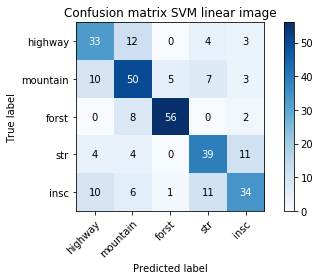

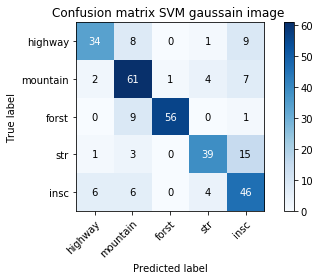

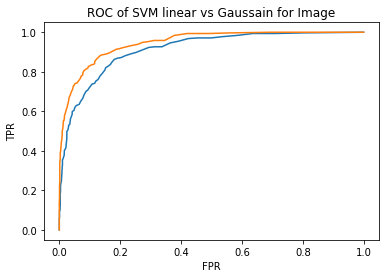

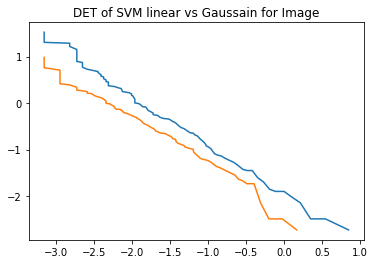

In [19]:
Predicted = svm_model_lineari.predict(X_itedata)

prob = svm_model_lineari.predict_proba(X_itedata)


Tv = np.zeros(5)
for i in range(np.shape(y_itedata)[0]):
    if(y_itedata[i][0]==1):
        Tv[0]=Tv[0]+1
    if(y_itedata[i][0]==2):
        Tv[1]=Tv[1]+1
    if(y_itedata[i][0]==3):
        Tv[2]=Tv[2]+1
    if(y_itedata[i][0]==4):
        Tv[3]=Tv[3]+1
    if(y_itedata[i][0]==5):
        Tv[4]=Tv[4]+1
    



T=np.full(int(Tv[0]),1,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),4,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),5,dtype='int')))

#print(T)

func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix SVM linear image')


gPredicted = svm_model_gaussi.predict(X_itedata)

gprob = svm_model_gaussi.predict_proba(X_itedata)

func2(T,gPredicted,classes=["1","2","3"],title='Confusion matrix SVM gaussain image ')


plt.show()
T=np.full(int(Tv[0]),0,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),1,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),4,dtype='int')))


plt.title("ROC of SVM linear vs Gaussain for Image")
ROCmodff(prob,T,100,"linear")
ROCmodff(gprob,T,100,"gaussian")
plt.show()

T=np.full(int(Tv[0]),0,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),1,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),4,dtype='int')))

plt.title("DET of SVM linear vs Gaussain for Image")
DETmodff(prob,T,100,"linear")
DETmodff(gprob,T,100,"gaussian")
plt.show()

In [38]:
trainfiles = glob.glob('/home/moiz/Documents/PRML3/*/train/*.mfcc',recursive=True)
testfiles = glob.glob('/home/moiz/Documents/PRML3/*/dev/*.mfcc',recursive=True)
def redundancy_v(files,res_dim):
    train = []
    traincounts = []
    for e in files:
        a = np.loadtxt(e,skiprows=1)
        curr = int(a.shape[0])
        res = []
        for i in range(int(curr)):
            res += list(np.tile(a[i],(res_dim//curr + int(res_dim%curr>i))))
        train+=[np.array(res)]
        traincounts+=[curr]
    return train,traincounts

In [39]:
X_vtrdata,_ = redundancy_v(trainfiles,194)
X_vtedata,_ = redundancy_v(testfiles,194)
X_vtrdata = np.array(X_vtrdata)
X_vtedata = np.array(X_vtedata)

In [40]:
# #not useful
# from sklearn.decomposition import PCA
# # pca = PCA(6)
# X = pca.fit_transform(X)
# devX = pca.transform(devX)

mapping = {}
mapping['o'] = 1.
mapping['1'] = 2.
mapping['4'] = 3.
mapping['z'] = 4.
mapping['6'] = 5.
y_vtrdata=[]
for i in trainfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_vtrdata.append(x)
y_vtrdata=np.array(y_vtrdata)

y_vtedata=[]
for i in testfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_vtedata.append(x)
y_vtedata=np.array(y_vtedata)

In [41]:
svm_model_linearv = SVC(kernel = 'linear', C = 1,probability=True).fit(X_vtrdata, y_vtrdata) 
svm_predictionsv = svm_model_linearv.predict(X_vtedata) 

accuracyv = svm_model_linearv.score(X_vtedata, y_vtedata) 

svm_model_gaussv = SVC(kernel = 'rbf', gamma = "auto",C=1,probability=True).fit(X_vtrdata, y_vtrdata) 
svm_gauss_predictionsv = svm_model_gaussv.predict(X_vtedata) 
gauss_accuracyv = svm_model_gaussv.score(X_vtedata, y_vtedata) 
print(gauss_accuracyv)

print(accuracyv)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9
0.95


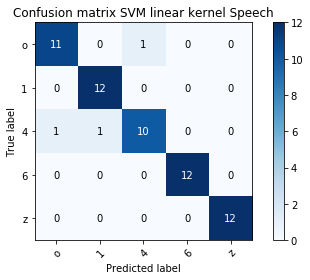

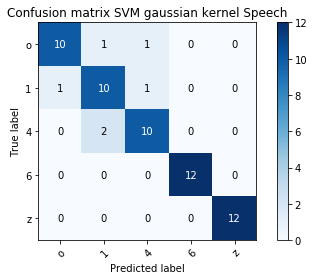

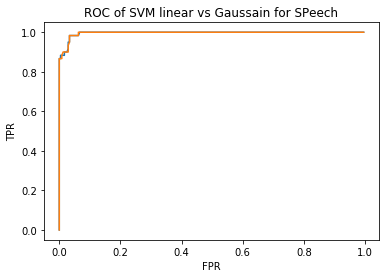

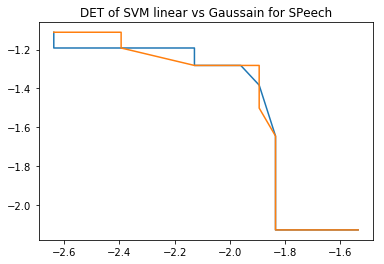

In [46]:
Predicted = svm_model_linearv.predict(X_vtedata)

prob = svm_model_linearv.predict_proba(X_vtedata)

Tv = np.zeros(5)
for i in range(np.shape(y_vtedata)[0]):
    if(y_vtedata[i][0]==1):
        Tv[0]=Tv[0]+1
    if(y_vtedata[i][0]==2):
        Tv[1]=Tv[1]+1
    if(y_vtedata[i][0]==3):
        Tv[2]=Tv[2]+1
    if(y_vtedata[i][0]==4):
        Tv[3]=Tv[3]+1
    if(y_vtedata[i][0]==5):
        Tv[4]=Tv[4]+1
T=np.full(int(Tv[0]),1,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),4,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),5,dtype='int')))
func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix SVM linear kernel Speech')
Predicted = svm_model_gaussv.predict(X_vtedata)

prob = svm_model_gaussv.predict_proba(X_vtedata)

Tv = np.zeros(5)
for i in range(np.shape(y_vtedata)[0]):
    if(y_vtedata[i][0]==1):
        Tv[0]=Tv[0]+1
    if(y_vtedata[i][0]==2):
        Tv[1]=Tv[1]+1
    if(y_vtedata[i][0]==3):
        Tv[2]=Tv[2]+1
    if(y_vtedata[i][0]==4):
        Tv[3]=Tv[3]+1
    if(y_vtedata[i][0]==5):
        Tv[4]=Tv[4]+1
T=np.full(int(Tv[0]),1,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),4,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),5,dtype='int')))
func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix SVM gaussian kernel Speech')
T=np.full(int(Tv[0]),0,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),1,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),4,dtype='int')))
plt.show()
plt.title("ROC of SVM linear vs Gaussain for SPeech")
ROCmodff(prob,T,100,"linear")
ROCmodff(gprob,T,100,"gaussain")
plt.show()

plt.title("DET of SVM linear vs Gaussain for SPeech")
DETmodff(prob,T,50,"linear")
DETmodff(gprob,T,50,"gaussian")
plt.show()

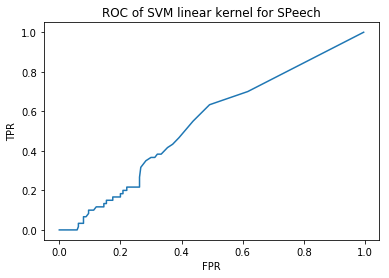

In [31]:
T=np.full(int(Tv[0]),0,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),1,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),4,dtype='int')))

plt.title("ROC of SVM linear kernel for SPeech")
ROCmodf(prob,T,100)

[ 2.63966689  0.09413741 -0.2533471  -0.52440051 -0.61029461 -0.72791329
 -0.84162123 -0.88714656 -0.98423496 -1.01872544 -1.03643339 -1.13033917
 -1.25816156 -1.25816156 -1.28155157 -1.30566453 -1.35631175 -1.38299413
 -1.46961274 -1.64485363 -1.68667082 -1.68667082 -1.68667082 -1.78046434
 -1.89318453 -1.89318453 -1.89318453 -1.89318453 -1.89318453 -1.95996398
 -2.03683413 -2.03683413 -2.03683413 -2.03683413 -2.03683413 -2.12804523
 -2.12804523 -2.12804523 -2.12804523 -2.24140273 -2.24140273 -2.3939798
 -2.3939798  -2.3939798  -2.3939798  -2.3939798  -2.3939798  -2.3939798
 -2.3939798  -2.3939798  -2.3939798  -2.3939798  -2.3939798  -2.3939798
 -2.63825727 -2.63825727 -2.63825727 -2.63825727 -2.63825727 -2.63825727
 -2.63825727 -2.63825727 -2.63825727 -2.63825727 -2.63825727 -2.63825727
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf      

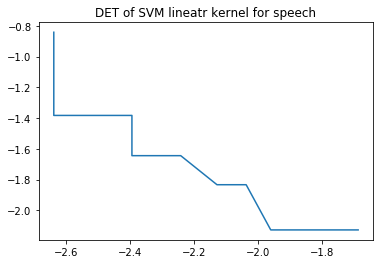

In [178]:
T=np.full(int(Tv[0]),0,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),1,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),4,dtype='int')))

plt.title("DET of SVM lineatr kernel for speech")
DETmodf(prob,T,100)

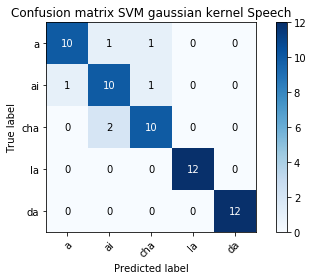

In [183]:
Predicted = svm_model_gaussv.predict(X_vtedata)

prob = svm_model_gaussv.predict_proba(X_vtedata)

Tv = np.zeros(5)
for i in range(np.shape(y_vtedata)[0]):
    if(y_vtedata[i][0]==1):
        Tv[0]=Tv[0]+1
    if(y_vtedata[i][0]==2):
        Tv[1]=Tv[1]+1
    if(y_vtedata[i][0]==3):
        Tv[2]=Tv[2]+1
    if(y_vtedata[i][0]==4):
        Tv[3]=Tv[3]+1
    if(y_vtedata[i][0]==5):
        Tv[4]=Tv[4]+1
T=np.full(int(Tv[0]),1,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),4,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),5,dtype='int')))
func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix SVM gaussian kernel Speech')

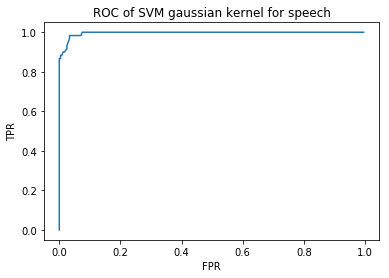

In [184]:
T=np.full(int(Tv[0]),0,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),1,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),4,dtype='int')))

plt.title("ROC of SVM gaussian kernel for speech")
ROCmodf(prob,T,100)

[ 2.63966689  0.14674496 -0.35178434 -0.64849218 -0.79777685 -0.98423496
 -1.07286134 -1.11077162 -1.23544034 -1.30566453 -1.38299413 -1.43953147
 -1.46961274 -1.46961274 -1.50108595 -1.53412054 -1.60572961 -1.60572961
 -1.60572961 -1.64485363 -1.7316644  -1.7316644  -1.7316644  -1.7316644
 -1.7316644  -1.78046434 -1.83391464 -1.83391464 -1.83391464 -1.83391464
 -1.89318453 -1.89318453 -1.89318453 -1.89318453 -1.89318453 -1.89318453
 -1.89318453 -1.89318453 -1.95996398 -1.95996398 -1.95996398 -1.95996398
 -1.95996398 -2.12804523 -2.12804523 -2.24140273 -2.24140273 -2.24140273
 -2.3939798  -2.63825727 -2.63825727 -2.63825727 -2.63825727 -2.63825727
 -2.63825727 -2.63825727        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf    

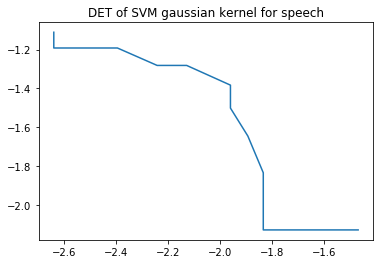

In [185]:
T=np.full(int(Tv[0]),0,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),1,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),4,dtype='int')))

plt.title("DET of SVM gaussian kernel for speech")
DETmodf(prob,T,100)